<a href="https://colab.research.google.com/github/ashdiqqi/PCVK_Ganjil_2024/blob/main/week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# F. TUGAS PRAKTIKUM

## 1. Buat Gamma Correction sesuai dengan petunjuk berikut

Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai
Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk
meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image
dengan gamma correction sesuai rumus yang telah diberikan.

In [4]:
from google.colab import drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Gamma Correction on Image
---------------------------
Enter Gamma value (e.g., 0.5, 1.0, 2.0): 2


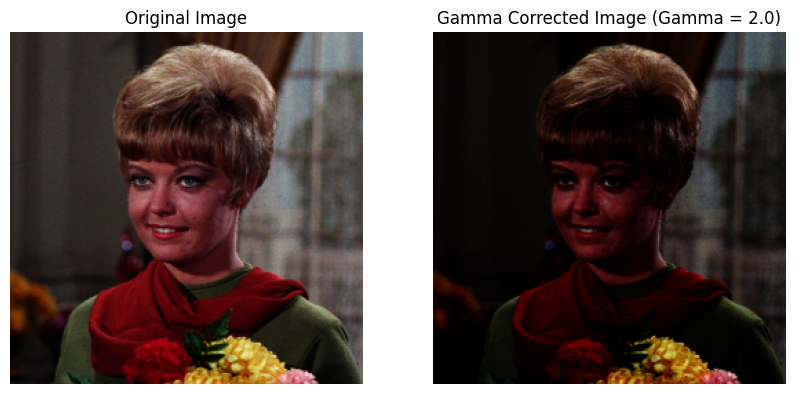

In [22]:
from google.colab import drive
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# Mount Google Drive to access image files
drive.mount('/content/drive')

print('Gamma Correction on Image')
print('---------------------------')

# Input gamma value
try:
    y = float(input('Enter Gamma value (e.g., 0.5, 1.0, 2.0): '))
except ValueError:
    print('Error, not a number')
    y = 1  # Default gamma value

# Read the original image from Google Drive
original = cv.imread('/content/drive/MyDrive/Assets/female.tiff')
if original is None:
    print("Error: Image not found.")
else:
    # Normalize the image to the range [0, 1] for computation
    normalized_img = original / 255.0

    # Apply gamma correction using the formula: I' = 255 * (I/255)^y
    gamma_corrected_img = 255.0 * (normalized_img ** y)

    # Convert the gamma-corrected image back to 8-bit format
    gamma_corrected_img = np.uint8(gamma_corrected_img)

    # Display original and gamma-corrected images using matplotlib
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title(f"Gamma Corrected Image (Gamma = {y})")
    plt.imshow(cv.cvtColor(gamma_corrected_img, cv.COLOR_BGR2RGB))
    plt.axis('off')

    plt.show()


## 2. Buat Image Depth

Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra,
pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada
pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga
255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000
0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika
7bit, maka jumlah warnanya adalah 27 = 128, dst. Berikut adalah kode untuk membaca citra masukan dan memberi nilai kedalaman citra,
silahkan lanjutkan kode program berikut sehingga menghasilkan keluaran seperti contoh
pada Gambar.

In [23]:
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/Assets/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

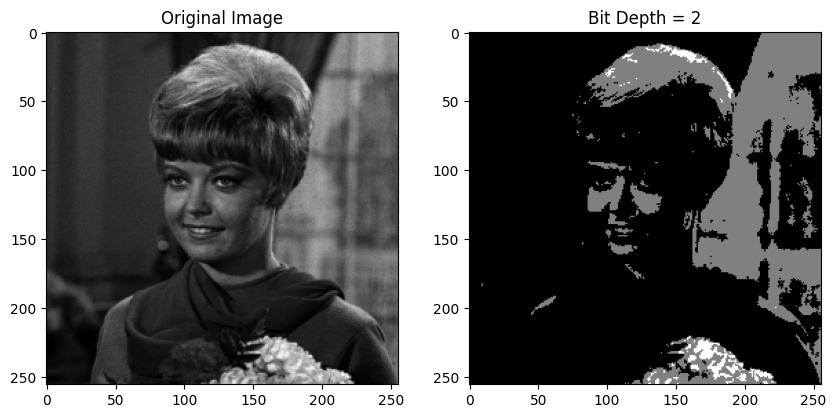

In [25]:
if original is None:
    print("Error: Image not found.")
else:
    # Create an empty image to store the depth-quantized result
    depth_image = np.zeros(original.shape, original.dtype)

    # Apply bit depth quantization
    depth_image = np.floor(original / level) * level

    # Convert the image back to 8-bit format for display
    depth_image = np.uint8(depth_image)

    # Display original and quantized images using matplotlib
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(original, cmap='gray')

    plt.subplot(1, 2, 2)
    plt.title(f"Bit Depth = {bit_depth}")
    plt.imshow(depth_image, cmap='gray')

    plt.show()

## 3. Buat modul Average Denoising *teks yang dimiringkan*

Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab
sebelumnya.  
Citra asli sudah disediakan pada /images/galaxy.jpg.
100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg
Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder ,
gunakan modul glob (import glob).

In [26]:
from google.colab import drive
import cv2 as cv
import numpy as np
import glob
from matplotlib import pyplot as plt

# Mount Google Drive to access image files
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
# Ask the user for the number of images to use for averaging
try:
    num_images = int(input("Enter the number of images to use for averaging: "))
except ValueError:
    print("Invalid input. Defaulting to using all images.")
    num_images = -1  # Use all images if the input is invalid


Enter the number of images to use for averaging: 5


In [32]:
# List to store the images
cv_img = []

# Load all the noisy images from the specified folder
for img in glob.glob('/content/drive/MyDrive/Assets/noises/93.jpg'):
    n = cv.imread(img)
    if n is not None:
        cv_img.append(n)
        # Stop adding images if we have reached the desired number
        if len(cv_img) == num_images:
            break

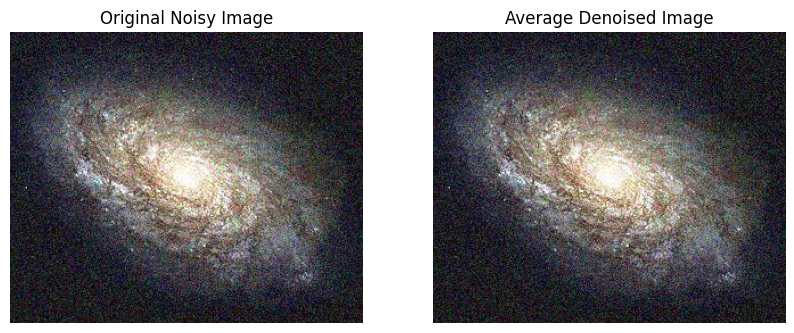

In [33]:
# Check if images are loaded
if len(cv_img) == 0:
    print("No images found in the directory.")
else:
    # Convert the list of images to a numpy array of type float for precise calculation
    images_array = np.array(cv_img, dtype=np.float32)

    # Calculate the average across all images in the list
    average_denoised = np.mean(images_array, axis=0)

    # Convert the denoised image back to 8-bit format
    average_denoised = np.uint8(average_denoised)

    # Display one of the original noisy images and the denoised image
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title("Original Noisy Image")
    plt.imshow(cv.cvtColor(cv_img[0], cv.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Average Denoised Image")
    plt.imshow(cv.cvtColor(average_denoised, cv.COLOR_BGR2RGB))
    plt.axis('off')

    plt.show()

4. Buat image masking untuk image berikut. Image kiri adalah image asli (images/couple.tiff),
sedangkan image paling kanan adalah hasilnya:

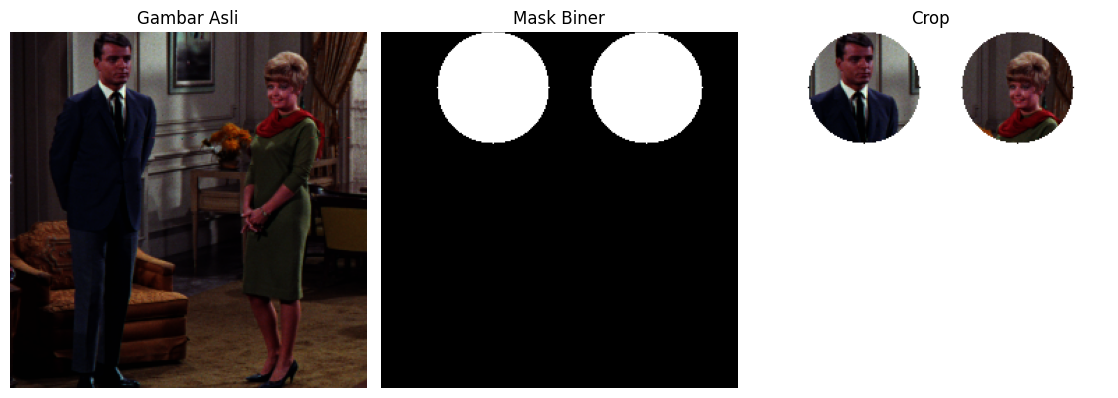

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar asli (couple.tiff)
gambar_asli = cv2.imread('/content/drive/MyDrive/Assets/couple.tiff')

# Mengubah gambar dari BGR ke RGB untuk ditampilkan dengan matplotlib
gambar_asli_rgb = cv2.cvtColor(gambar_asli, cv2.COLOR_BGR2RGB)

# Membuat mask biner dengan dua lingkaran pada posisi yang berbeda
mask = np.zeros(gambar_asli.shape[:2], dtype="uint8")

# Menggambar dua lingkaran pada mask (dua area mask)
cv2.circle(mask, (80, 40), 40, 255, -1)  # Lingkaran pertama di koordinat (80, 40)
cv2.circle(mask, (190, 40), 40, 255, -1)  # Lingkaran kedua di koordinat (190, 40)


# Membuat inverse mask
mask_inverse = cv2.bitwise_not(mask)

# Mengambil area foreground dari gambar asli
foreground = cv2.bitwise_and(gambar_asli, gambar_asli, mask=mask)

# Membuat background hitam dengan mask inverse
background = cv2.bitwise_and(gambar_asli, gambar_asli, mask=mask_inverse)

# Menampilkan gambar asli, mask, dan hasil masking
plt.figure(figsize=(15, 5))
# Gambar Asli
plt.subplot(1, 4, 1)
plt.imshow(gambar_asli_rgb)
plt.title('Gambar Asli')
plt.axis('off')

# Mask Biner (hitam-putih)
plt.subplot(1, 4, 2)
plt.imshow(mask, cmap='gray')
plt.title('Mask Biner')
plt.axis('off')

# Hasil Masking Lingkaran 1
# Ubah area hitam (nilai 0) menjadi putih (nilai 255)
lingkaran1 = cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB)
lingkaran1[lingkaran1 == 0] = 255

# Menampilkan lingkaran dengan background putih
plt.subplot(1, 4, 3)
plt.imshow(lingkaran1)
plt.title('Crop')
plt.axis('off')


plt.tight_layout()
plt.show()

## 5. . Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini.
Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.

Masukkan operator biner (NOT, OR, AND, NAND, XOR): and


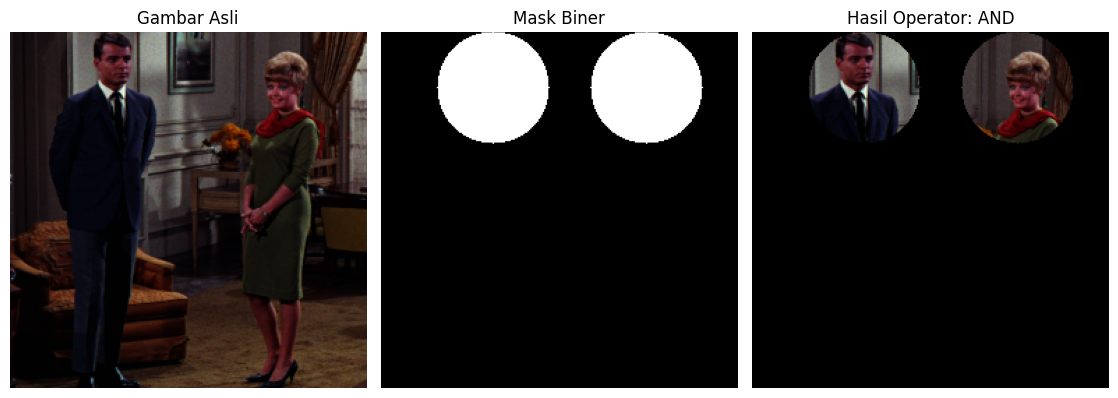

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menerapkan operator biner pada gambar
def apply_operator(operator, img1, img2):
    if operator == 'NOT':
        return cv2.bitwise_not(img1)
    elif operator == 'OR':
        return cv2.bitwise_or(img1, img2)
    elif operator == 'AND':
        return cv2.bitwise_and(img1, img2)
    elif operator == 'NAND':
        return cv2.bitwise_not(cv2.bitwise_and(img1, img2))
    elif operator == 'XOR':
        return cv2.bitwise_xor(img1, img2)
    else:
        print("Operator tidak valid!")
        return None

# Membaca gambar asli (couple.tiff)
gambar_asli = cv2.imread('/content/drive/MyDrive/Assets/couple.tiff')

# Mengubah gambar dari BGR ke RGB untuk ditampilkan dengan matplotlib
gambar_asli_rgb = cv2.cvtColor(gambar_asli, cv2.COLOR_BGR2RGB)

# Membuat mask biner dengan dua lingkaran pada posisi yang berbeda
mask = np.zeros(gambar_asli.shape[:2], dtype="uint8")
cv2.circle(mask, (80, 40), 40, 255, -1)  # Lingkaran pertama di koordinat (80, 40)
cv2.circle(mask, (190, 40), 40, 255, -1)  # Lingkaran kedua di koordinat (190, 40)

# Membuat inverse mask
mask_inverse = cv2.bitwise_not(mask)
# Mengambil area foreground dan background dari gambar asli
foreground = cv2.bitwise_and(gambar_asli, gambar_asli, mask=mask)
background = cv2.bitwise_and(gambar_asli, gambar_asli, mask=mask)

# Menerima input operator dari pengguna
operator = input("Masukkan operator biner (NOT, OR, AND, NAND, XOR): ").upper()

# Menerapkan operator biner yang dipilih
output_image = apply_operator(operator, foreground, background)

if output_image is not None:
    # Ubah gambar hasil dari BGR ke RGB untuk ditampilkan
    output_image_rgb = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)

    # Menampilkan gambar asli, mask, dan hasil dari operator yang dipilih
    plt.figure(figsize=(15, 5))

    # Gambar Asli
    plt.subplot(1, 4, 1)
    plt.imshow(gambar_asli_rgb)
    plt.title('Gambar Asli')
    plt.axis('off')

    # Mask Biner
    plt.subplot(1, 4, 2)
    plt.imshow(mask, cmap='gray')
    plt.title('Mask Biner')
    plt.axis('off')

    # Gambar Hasil Operator
    plt.subplot(1, 4, 3)
    plt.imshow(output_image_rgb)
    plt.title(f'Hasil Operator: {operator}')
    plt.axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("Operator tidak valid")